# Notebook for prediction result analysis with figures

In [3]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"]=300
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr,spearmanr

from src.utils import reconst_pair_idx



In [93]:
data_dir=f"./results/runs/MLP_split_large_ave_cdhit09_model_mod"
score_path=os.path.join(data_dir,"score_dict.pkl")
preds_path=os.path.join(data_dir,"pred_results.pkl")

with open(score_path,"rb") as f:
    score=pickle.load(f)
with open(preds_path,"rb") as f:
    pred_results=pickle.load(f) # [pair_idx_list,preds,out_labels,out_logits]

print(score)


{'accuracy': 0.6476190476190476, 'precision': 0.6288819875776398, 'recall': 0.7223543400713437, 'f1': 0.6723851687880464, 'confusion_matrix': array([[ 961,  717],
       [ 467, 1215]]), 'fpr_all': array([0.        , 0.        , 0.        , ..., 0.9988081 , 0.99940405,
       1.        ]), 'tpr_all': array([0.00000000e+00, 5.94530321e-04, 1.18906064e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 'roc_thresh': array([1.9599217 , 0.9599217 , 0.9481485 , ..., 0.01610078, 0.00884438,
       0.00631139], dtype=float32), 'auc_roc': 0.7005420217432281}


In [5]:
## For contrastive learning
data_dir=f"./results/runs/multi_contrastive_each_species_out_pred"
score_path=os.path.join(data_dir,"score_dict.pkl")
preds_path=os.path.join(data_dir,"pred_results.pkl")

with open(score_path,"rb") as f:
    score=pickle.load(f)

with open(preds_path,"rb") as f:
    pred_results=pickle.load(f) # (out_cos_sim,out_logits,pair_idx_list)

print(score)


{'accuracy': 0.6469323394495413, 'precision': 0.6027777777777777, 'recall': 0.8682480708773935, 'f1': 0.711558730530507, 'confusion_matrix': array([[1475, 2002],
       [ 461, 3038]]), 'fpr_all': array([0.        , 0.        , 0.        , ..., 0.99942479, 0.9997124 ,
       1.        ]), 'tpr_all': array([0.00000000e+00, 2.85795942e-04, 5.71591883e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 'roc_thresh': array([1.9983335 , 0.9983334 , 0.99817824, ..., 0.01899686, 0.01810399,
       0.01800194], dtype=float32), 'auc_roc': 0.7247736996716182}


In [24]:
## For contrastive learning
data_dir=f"./results/runs/contrastive_learning_best_loss"
score_path=os.path.join(data_dir,"score_dict.pkl")
preds_path=os.path.join(data_dir,"pred_results.pkl")

with open(score_path,"rb") as f:
    score=pickle.load(f)

with open(preds_path,"rb") as f:
    pred_results=pickle.load(f) # (out_cos_sim,out_logits,pair_idx_list)

print(score)


{'accuracy': 0.6616071428571428, 'precision': 0.6173052087817478, 'recall': 0.8525564803804994, 'f1': 0.7161048689138576, 'confusion_matrix': array([[ 789,  889],
       [ 248, 1434]]), 'fpr_all': array([0.        , 0.        , 0.        , ..., 0.9988081 , 0.99940405,
       1.        ]), 'tpr_all': array([0.00000000e+00, 5.94530321e-04, 1.18906064e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 'roc_thresh': array([1.697429  , 0.69742894, 0.694263  , ..., 0.36313856, 0.3628596 ,
       0.35932797], dtype=float32), 'auc_roc': 0.7246941959951758}


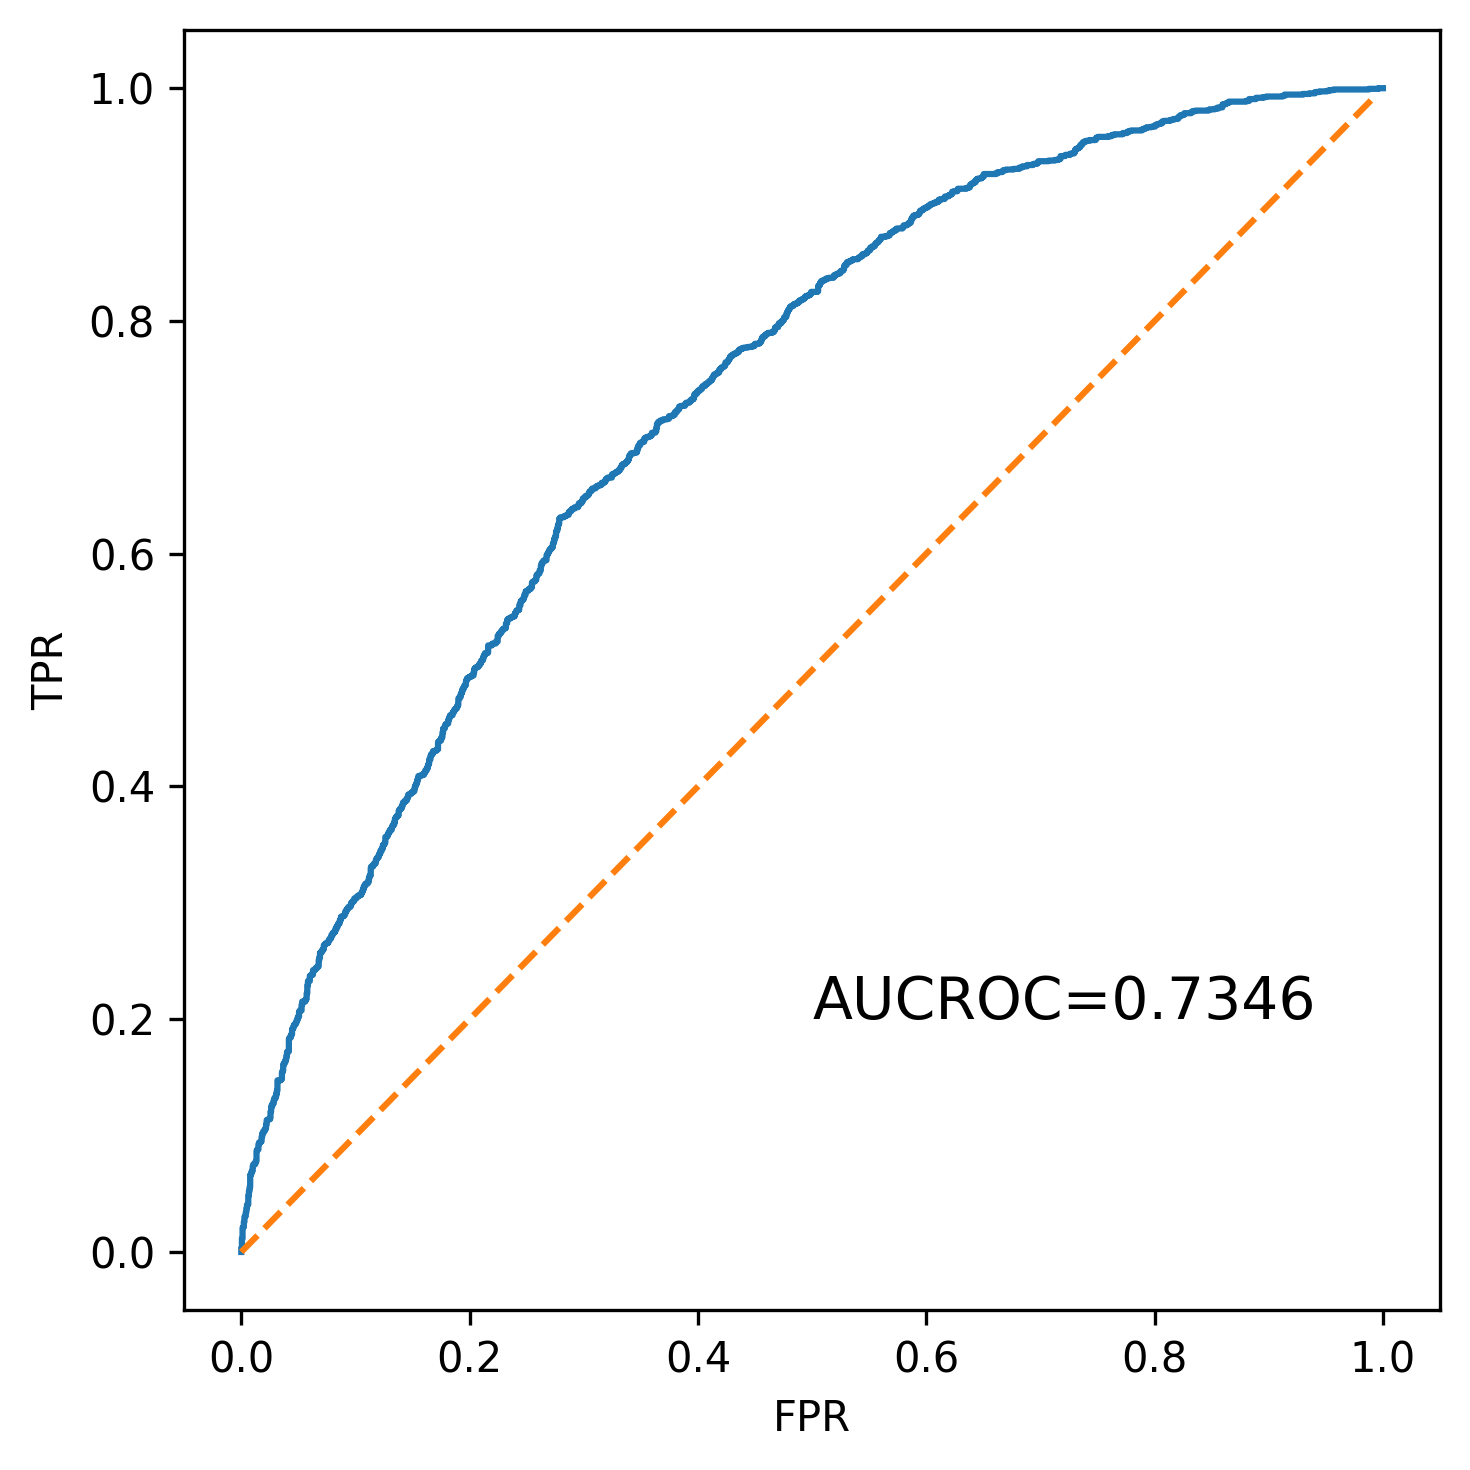

In [146]:
fig=plt.figure(figsize=(5,5))
line=np.arange(0,1,0.01)
auc_roc=score["auc_roc"]
plt.plot(score["fpr_all"],score["tpr_all"])
plt.plot(line,line,linestyle="--")
plt.text(0.5,0.2,f"AUCROC={score['auc_roc']:.4f}",fontsize=14)
#plt.title(os.path.basename(data_dir))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.tight_layout()
plt.savefig(f"./results/imgs/aucroc_{os.path.basename(data_dir)}")


## Multi result comparison

In [83]:
## Data setup
root_dir="./results/runs"
data_list=["MLP_split_large_ave_cdhit09_model_mod","contrastive_1e4","mouse_MLP_split_large_ave_cdhit09","mouse_contrastive_1e4"]
score_dic=dict()
pred_res_dic=dict()
for d in data_list:
    data_dir=os.path.join(root_dir,d)
    score_path=os.path.join(data_dir,"score_dict.pkl")
    preds_path=os.path.join(data_dir,"pred_results.pkl")

    with open(score_path,"rb") as f:
        score=pickle.load(f)
    with open(preds_path,"rb") as f:
        pred_results=pickle.load(f)
    
    score_dic[d]=score
    pred_res_dic[d]=pred_results


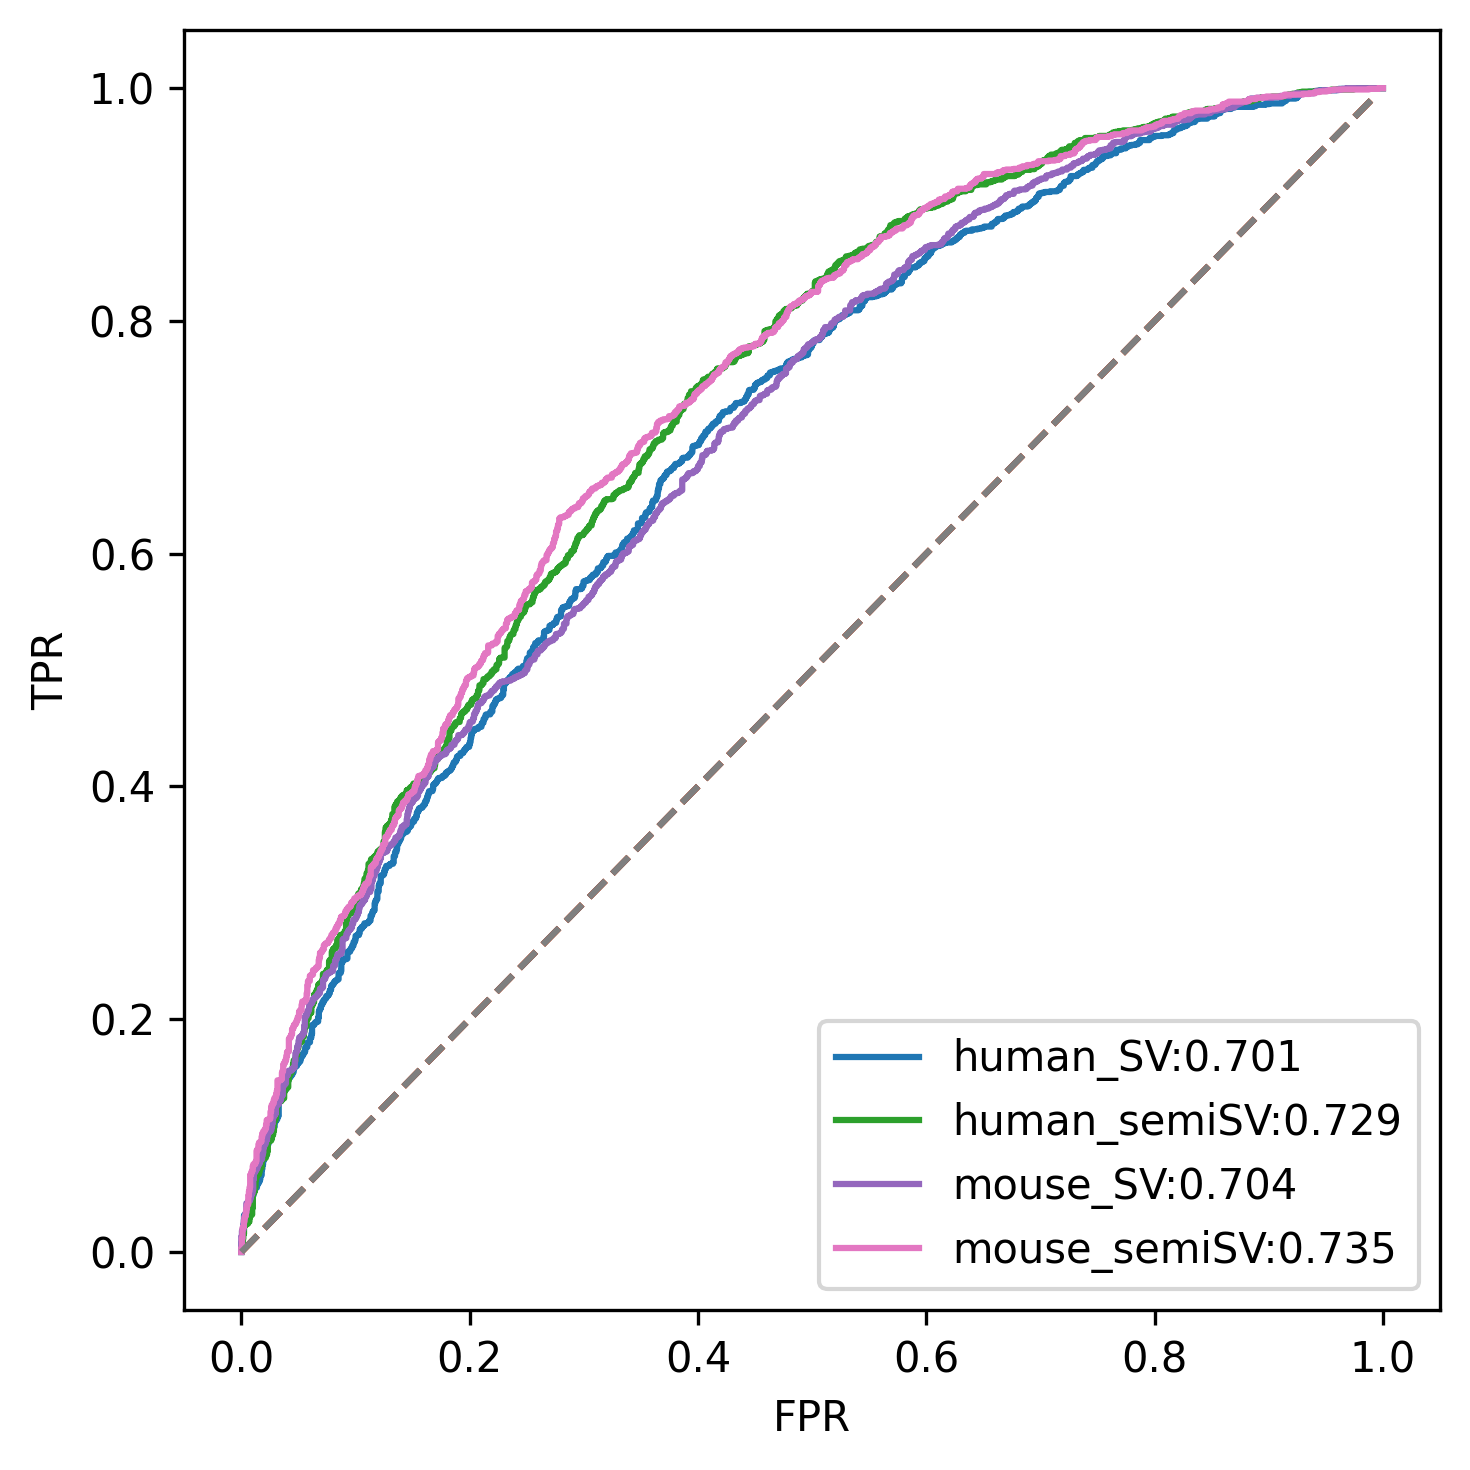

In [89]:
fig=plt.figure(figsize=(5,5))
line=np.arange(0,1,0.01)
label_list=["human_SV","human_semiSV","mouse_SV","mouse_semiSV"]
for (s_k,s_v),(p_k,p_v),l in zip(score_dic.items(),pred_res_dic.items(),label_list):
    auc_roc=s_v["auc_roc"]
    plt.plot(s_v["fpr_all"],s_v["tpr_all"],label=f"{l}:{auc_roc:.3f}")
    plt.plot(line,line,linestyle="--")
    #plt.text(0.5,0.2,f"AUCROC={auc_roc:.4f}",fontsize=14)
    #plt.title(os.path.basename(data_dir))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.tight_layout()
    plt.savefig(f"./results/imgs/aucroc_multi_comparison")


## Analysis prediction result

In [27]:
seq_df = pd.read_csv("./data/human/gencode44_utr_gene_unique_cdhit09.csv",index_col=0)
pair_idx = reconst_pair_idx(pred_results[-1])
logits=pred_results[0].reshape(-1)
#cos_sim = pred_results[0].reshape(-1)


In [ ]:
df_pred_res=pd.DataFrame(pair_idx,columns=["utr5","utr3","label"])
df_pred_res["pred"] = pred_results[1]
df_pred_res["correct"] = (df_pred_res["label"]==df_pred_res["pred"]).values
df_pred_res["logits"] = logits
df_pred_res["ENST_ID"]=seq_df.iloc[df_pred_res.utr5.values]["ENST_ID"].values
df_pred_res["GENE"]=seq_df.iloc[df_pred_res.utr5.values]["GENE"].values
df_pred_res=pd.concat([df_pred_res,seq_df.iloc[:,-4:].iloc[df_pred_res.utr5.values].reset_index(drop=True)],axis=1)
df_pred_res.sort_values("logits",ascending=False,inplace=True)
#df_pred_res.to_csv(f"human_pred_analysis_seed{seed}.csv")
df_pred_res


In [53]:
topk=200
top_genes=df_pred_res[(df_pred_res["correct"]==True)&(df_pred_res["label"]==1)].iloc[:topk]["GENE"].values
meta_scape=pd.DataFrame({"Gene":top_genes,"OptionalDataColumns":np.arange(len(top_genes))})
meta_scape.to_csv(f"./results/analysis/human_top{topk}_related_genes_seed{seed}.csv",index=False)


In [18]:
mlp_logits=logits
cos_sim=pred_results[0].reshape(-1)
cl_logits=pred_results[1].reshape(-1)


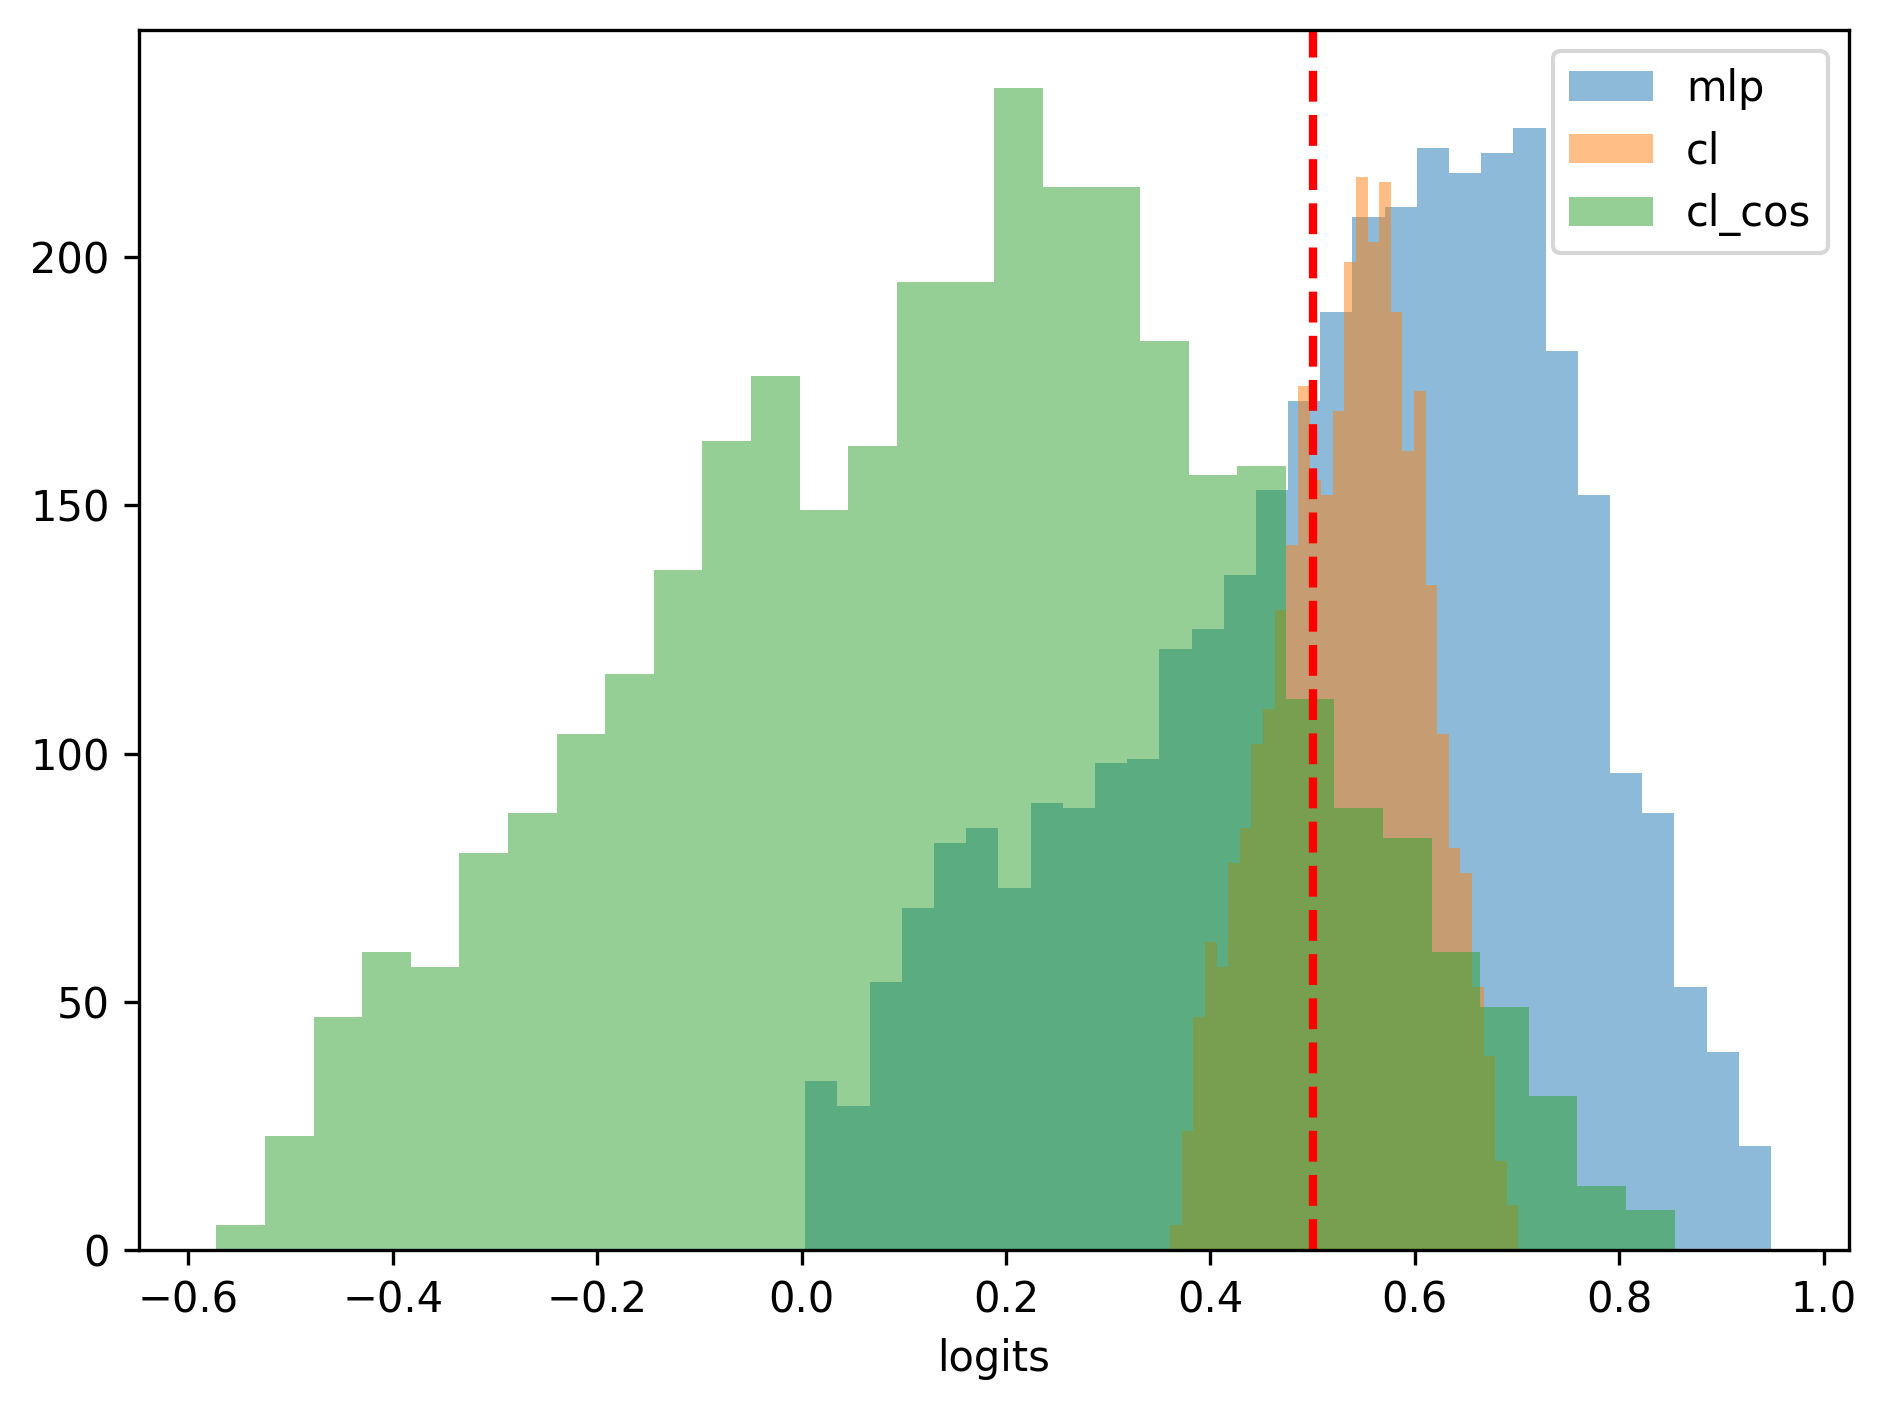

In [23]:
plt.hist(mlp_logits,alpha=0.5,bins=30,label="mlp")
plt.hist(cl_logits,alpha=0.5,bins=30,label="cl")
plt.hist(cos_sim,alpha=0.5,bins=30,label="cl_cos")
#plt.xlim([0,1])
plt.legend()
plt.axvline(x=0.5, color='red', linestyle='dashed', linewidth=2,)
plt.xlabel("logits")
plt.tight_layout()
#plt.savefig("./results/analysis/human_pred_logits_dist",facecolor="white")


In [58]:
gene_list=[]
for i in range(5):
    tmp_df=pd.read_csv(f"./results/analysis/human_top100_related_genes_seed{i+1}.csv")
    gene_list.extend(tmp_df["Gene"].values[:50])

df=pd.DataFrame({"Gene":gene_list,"optional":np.arange(len(gene_list))})
df.to_csv("./results/analysis/human_top_logits_5iter_allow_double.csv",index=False)


# Analysis prediction result for Contrastive Learning

In [4]:
seq_df = pd.read_csv("./data/human/gencode44_utr_gene_unique_cdhit09.csv",index_col=0)
pair_idx = reconst_pair_idx(pred_results[-1])
logits=pred_results[1].reshape(-1)
cos_sim = pred_results[0].reshape(-1)
"""
scaler=StandardScaler()
cos_sim_norm=scaler.fit_transform(cos_sim.reshape(-1,1))
logits_norm = F.sigmoid(torch.tensor(cos_sim_norm.reshape(-1)))
"""


'\nscaler=StandardScaler()\ncos_sim_norm=scaler.fit_transform(cos_sim.reshape(-1,1))\nlogits_norm = F.sigmoid(torch.tensor(cos_sim_norm.reshape(-1)))\n'

In [22]:
def discritize(logit,thresh=0.5):
    pred = 1 if logit>=thresh else 0
    return pred


In [23]:
df_pred_res=pd.DataFrame(pair_idx,columns=["utr5","utr3","label"])
df_pred_res["pred"] = list(map(discritize,pred_results[1]))
df_pred_res["correct"] = (df_pred_res["label"]==df_pred_res["pred"]).values
df_pred_res["logits"] = logits
df_pred_res["cos_sim"] = cos_sim
df_pred_res["ENST_ID"]=seq_df.iloc[df_pred_res.utr5.values]["ENST_ID"].values
df_pred_res["ENST_ID_PRE"]=list(map(lambda enst_id: enst_id.split(".")[0],df_pred_res["ENST_ID"].values))
df_pred_res["GENE"]=seq_df.iloc[df_pred_res.utr5.values]["GENE"].values
df_pred_res=pd.concat([df_pred_res,seq_df.iloc[:,-4:].iloc[df_pred_res.utr5.values].reset_index(drop=True)],axis=1)
df_pred_res.sort_values("cos_sim",ascending=False,inplace=True)
#df_pred_res.to_csv(f"human_pred_analysis_seed{seed}.csv")
df_pred_res


,utr5,utr3,label,pred,correct,logits,cos_sim,ENST_ID,ENST_ID_PRE,GENE,total_len,5UTR_len,CDS_len,3UTR_len
111,1865,1865,1,1,True,0.995589,5.419236,ENST00000381620.9,ENST00000381620,GABRA2,8520,404,1356,6760
428,7056,7056,1,1,True,0.994937,5.280802,ENST00000706482.1,ENST00000706482,FOXG1,4673,1675,1470,1528
50,10941,10941,1,1,True,0.994678,5.230496,ENST00000393092.7,ENST00000393092,DPEP1,1734,291,1236,207
1572,3265,3265,1,1,True,0.994427,5.184220,ENST00000308641.6,ENST00000308641,APOBEC4,2782,275,1104,1403
1302,13140,13140,1,1,True,0.994154,5.136058,ENST00000361360.4,ENST00000361360,POU3F3,4460,1396,1503,1561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,13197,2682,0,0,True,0.033327,-3.367498,ENST00000296795.8,ENST00000296795,TLR3,6015,100,2715,3200
1780,4777,4857,0,0,True,0.031138,-3.437679,ENST00000298105.8,ENST00000298105,METTL21EP,1291,297,645,349
1832,3886,4652,0,0,True,0.029555,-3.491495,ENST00000625203.2,ENST00000625203,OR5L1,1110,100,936,74
2887,13534,11976,0,0,True,0.027206,-3.576718,ENST00000408978.9,ENST00000408978,MYO3B,6213,141,4026,2046


### 2. Analysis of corr between logits and TE

In [140]:
te=pd.read_table("data/human/TE/df_counts_and_len.TE_sorted.HEK_Andrev2015.with_annot.txt",sep=" ")
#te=pd.read_table("data/human/TE/df_counts_and_len.TE_sorted.pc3.with_annot.txt",sep=" ")
te=te.dropna()
te=te[(te["rpkm_riboseq"]>0.1)&(te["rpkm_rnaseq"]>5)]
te_enst=te["ensembl_tx_id"].values

gencode_enst=df_pred_res[(df_pred_res["label"]==1)&(df_pred_res["cos_sim"]>0.3)]["ENST_ID_PRE"].values
match_id=list(set(te_enst)&set(gencode_enst))
print(len(match_id))


155


pearson:-0.15952125005511686
spearman:-0.13661177532145274


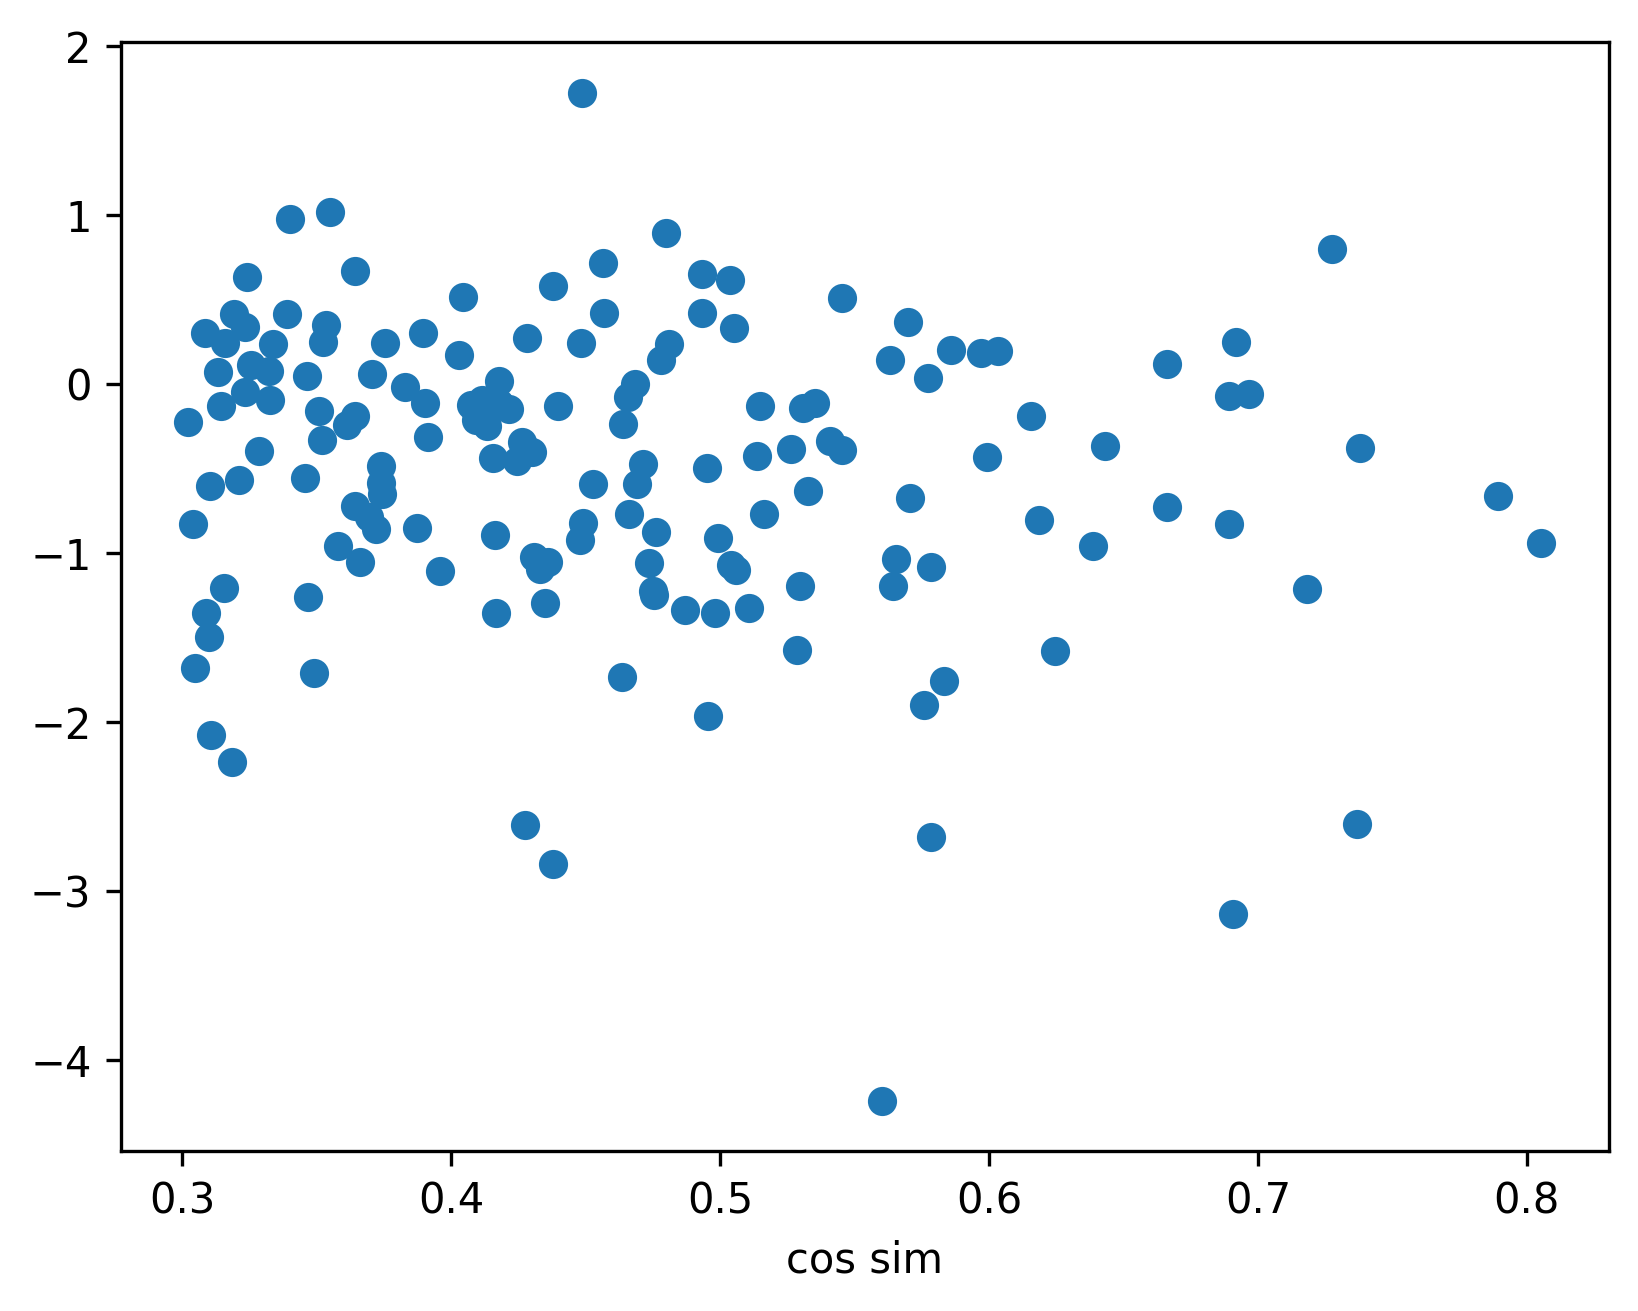

In [142]:
pred_val=df_pred_res[(df_pred_res["label"]==1)&(df_pred_res["cos_sim"]>0.3)].set_index("ENST_ID_PRE").loc[match_id]["cos_sim"].values
log_te = np.log(te.set_index("ensembl_tx_id").loc[match_id]["te"].values)

plt.scatter(pred_val,log_te)
pearson,_ = pearsonr(pred_val,log_te)
spearman,_ = spearmanr(pred_val,log_te)
plt.xlabel("cos sim")
print(f"pearson:{pearson}")
print(f"spearman:{spearman}")


### 3. Analysis corr between logits and crafted_features

In [6]:
df_5utr = pd.read_csv("./data/human/gencode44_utr_gene_unique_cdhit09_max10k_feature_5utr.csv",index_col=0)
df_3utr = pd.read_csv("./data/human/gencode44_utr_gene_unique_cdhit09_max10k_feature_3utr.csv",index_col=0)


In [63]:
### align pred_res and feature_df with ENST_ID
target_df=df_pred_res[(df_pred_res["label"]==1)&(df_pred_res["correct"]==1)]
enst_id = target_df["ENST_ID"].values
feat_id = df_5utr.index.values
match_id = list(set(enst_id)&set(feat_id))
target_feat_df_5utr = df_5utr.loc[match_id]
target_feat_df_3utr = df_3utr.loc[match_id]
logits = target_df.set_index("ENST_ID").loc[match_id]["cos_sim"].values


In [64]:
corr_dic = dict()

for i,c in enumerate(target_feat_df_5utr.columns):
    feat_val_utr5,feat_val_utr3 = target_feat_df_5utr.iloc[:,i].values,target_feat_df_3utr.iloc[:,i].values
    p_corr_utr5,_ =pearsonr(feat_val_utr5,logits)
    p_corr_utr3,_ =pearsonr(feat_val_utr3,logits)
    corr_dic["utr5_"+c]=p_corr_utr5
    corr_dic["utr3_"+c]=p_corr_utr3


In [66]:
score_sorted = sorted(corr_dic.items(), key=lambda x:abs(x[1]))[::-1]


## analysis for each species from multi learning

In [56]:
## human
score_dic=dict()
thresh=np.arange(0.1,1.0,0.1)
for th in thresh:
    preds = discretize(logits,threshold=th)
    scores= metrics(preds[pair_idx[:,0]<len(seq_df)],label=pair_idx[pair_idx[:,0]<len(seq_df)][:,-1],out_logits=logits_norm[pair_idx[:,0]<len(seq_df)],phase="test")
    score_dic[th]=dict()
    for k,v in scores.items():
        if type(v)==np.float64:
            score_dic[th][k]=v

score_df = pd.DataFrame(score_dic).T
score_df


,accuracy,precision,recall,f1,auc_roc
0.1,0.542849,0.522593,0.991135,0.684350,0.716392
0.2,0.580674,0.545606,0.965130,0.697118,0.716392
0.3,0.605792,0.564435,0.926714,0.701566,0.716392
0.4,0.630615,0.585725,0.892435,0.707260,0.716392
0.5,0.647459,0.605408,0.846927,0.706085,0.716392
0.6,0.666371,0.632471,0.794326,0.704218,0.716392
0.7,0.664894,0.651795,0.708038,0.678754,0.716392
0.8,0.648345,0.668683,0.588061,0.625786,0.716392
0.9,0.606974,0.693376,0.383570,0.493912,0.716392


In [57]:
## human
score_dic=dict()
thresh=np.arange(0.1,1.0,0.1)
for th in thresh:
    preds = discretize(logits,threshold=th)
    scores= metrics(preds[pair_idx[:,0]>=len(seq_df)],label=pair_idx[pair_idx[:,0]>=len(seq_df)][:,-1],out_logits=logits_norm[pair_idx[:,0]>=len(seq_df)],phase="test")
    score_dic[th]=dict()
    for k,v in scores.items():
        if type(v)==np.float64:
            score_dic[th][k]=v

score_df = pd.DataFrame(score_dic).T
score_df


,accuracy,precision,recall,f1,auc_roc
0.1,0.534243,0.519342,0.995573,0.682603,0.733968
0.2,0.574332,0.542769,0.976204,0.697647,0.733968
0.3,0.600223,0.560720,0.947980,0.704648,0.733968
0.4,0.625278,0.580118,0.923630,0.712639,0.733968
0.5,0.646437,0.600449,0.888213,0.716518,0.733968
0.6,0.658686,0.619106,0.835639,0.711258,0.733968
0.7,0.661470,0.637891,0.756502,0.692152,0.733968
0.8,0.664254,0.670255,0.654676,0.662374,0.733968
0.9,0.638363,0.727191,0.449917,0.555897,0.733968
